%

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sklearn
import sklearn.cluster
import sklearn.datasets
import seaborn as sns

In [3]:
import sklearn.decomposition

In [4]:
RANDOM_SEED = 424242
PCA_COMPONENTS=2
KMEANS_CLUSTERS=3

In [5]:
dataset = sklearn.datasets.fetch_covtype(
    data_home='data/covtype',
    random_state=RANDOM_SEED
)
# dataset = sklearn.datasets.load_iris()
df = pd.DataFrame(
    data=dataset['data'],
    columns=dataset['feature_names']
)
df['target'] = dataset['target']
#%%

In [6]:
pca = sklearn.decomposition.PCA(
    n_components=PCA_COMPONENTS,
    random_state=RANDOM_SEED
)
pca_features = pca.fit_transform(df)

In [7]:
kmeans = sklearn.cluster.KMeans(
    n_clusters=KMEANS_CLUSTERS,
    random_state=RANDOM_SEED
)
kmeans_clusters = kmeans.fit_predict(df)

In [8]:
kmeans_clusters

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [9]:
df['pca_0'] = pca_features[:, 0]
df['pca_1'] = pca_features[:, 1]

convert clusters to strings,<br>
this forces sns to use categorical palette

In [10]:
df['cluster'] = kmeans_clusters.astype(str)
df.sort_values(by='cluster', inplace=True)

%<br>
non-clustered

[Text(0.5, 0, ''), Text(0, 0.5, '')]

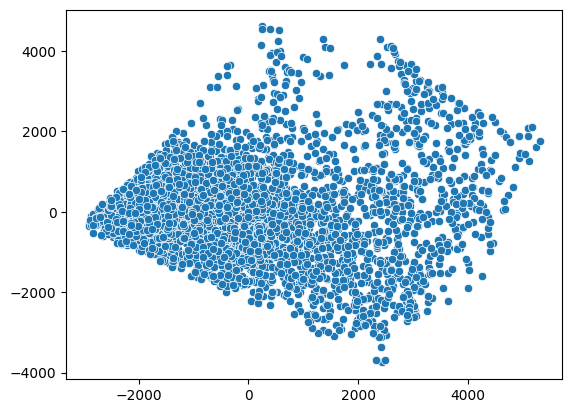

In [11]:
g = sns.scatterplot(
    data=df.sample(4000, random_state=RANDOM_SEED),
    x='pca_0',
    y='pca_1'
)
g.set(xlabel=None, ylabel=None)

%<br>
clustered

clusters

[Text(0.5, 0, ''), Text(0, 0.5, '')]

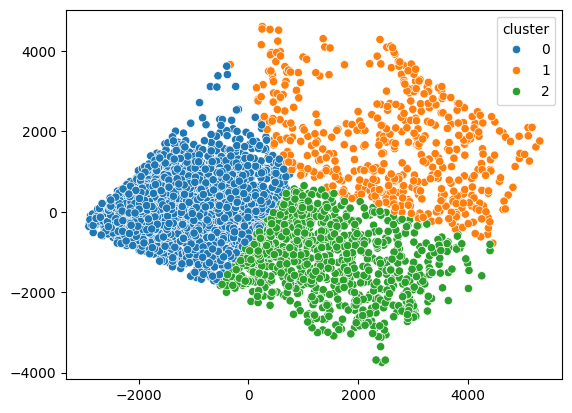

In [12]:
g = sns.scatterplot(
    data=df.sample(4000, random_state=RANDOM_SEED),
    x='pca_0',
    y='pca_1',
    hue='cluster',
)
g.set(xlabel=None, ylabel=None)

#centroids<br>
pca_centroids_projected = pca_model.transform(kmeans.cluster_centers_)

In [13]:
df_clusters = pd.DataFrame(
    data=kmeans.cluster_centers_,
    columns=kmeans.feature_names_in_
)
pca_centroids_projected = pca.transform(df_clusters)
centroid_labels = np.array(range(KMEANS_CLUSTERS), dtype=str)
sns.scatterplot(
    x=pca_centroids_projected[:, 0],
    y=pca_centroids_projected[:, 1],
    hue=centroid_labels,
    s=100,
    marker='D',
    ec='white',
    legend=False,
    alpha=1,
    linewidth=2,
    ax=g,
)

<Axes: >